In [1]:
import numpy as np
import torch
from models.cmlp import cMLP, cMLPSparse, train_model_adam, train_model_gista
from synthetic import simulate_var
import matplotlib.pyplot as plt

# cMLP Lagged VAR Demo
- In this notebook, we train a cMLP model on data simulated from a vector autoregressive (VAR) process with lagged interactions. We use the hierarchical sparse penalty to perform lag selection.
- We use unregularized pretraining before training with GISTA.
- After examining the Granger causality discovery, we train a debiased model using only the discovered interactions.

In [2]:
# For CPU or GPU acceleration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device.type=='cpu')

True


In [5]:
# Simulate data
p = 3  # num_of_time series
T = 100 # samples
var_lag = 1
X_np, beta, GC = simulate_var(p, T, var_lag)
X = torch.tensor(X_np[np.newaxis], dtype=torch.float32, device=device)

print(X_np.shape)
print(X.shape)
print(beta)
print(type(GC))

ValueError: Negative dimensions are not allowed

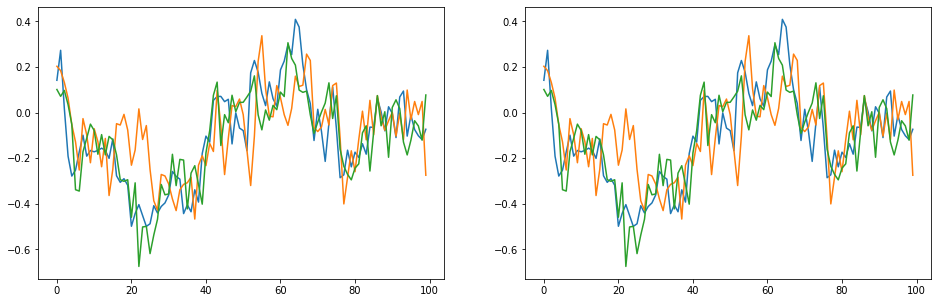

In [7]:
# Plot data
fig, axarr = plt.subplots(1, 2, figsize=(16, 5))
axarr[0].plot(X_np)
axarr[1].plot(X_np[:100])
plt.show()

In [8]:
# Set up model
lag = 1
hidden = [5]

if device.type == 'cpu':
    cmlp = cMLP(p, lag, hidden)
else:
    cmlp = cMLP(p, lag, hidden).cuda(device=device) # GPU

training


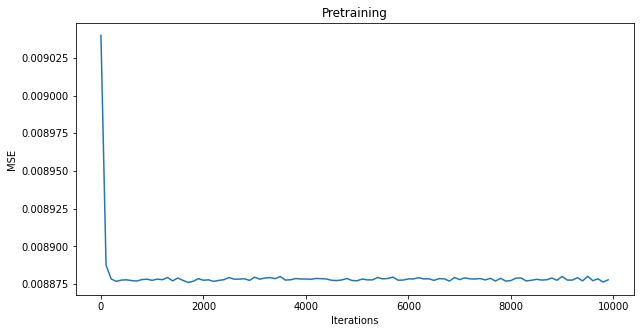

In [16]:
# Pretrain (no regularization)
check_every = 100
train_loss_list = train_model_adam(cmlp, X, lr=1e-2, niter=10000, check_every=check_every)
print('training')
# Plot loss function
plt.figure(figsize=(10, 5))
plt.title('Pretraining')
plt.ylabel('MSE')
plt.xlabel('Iterations')
plt.plot(check_every * np.arange(len(train_loss_list)), train_loss_list)
plt.show()

In [17]:
# Train with GISTA
check_every = 100
train_loss_list, train_mse_list = train_model_gista(
    cmlp, X, lam=0.012, lam_ridge=1e-4, lr=0.02, penalty='H', max_iter=10000, check_every=check_every)

----------Iter = 100----------
Total loss = 0.064855
MSE = 0.008881, Ridge = 0.000107, Nonsmooth = 0.055867
Variable usage = 100.00%
Switching to line search


----------Iter = 200----------
Total loss = 0.064020
MSE = 0.008891, Ridge = 0.000107, Nonsmooth = 0.055022
Variable usage = 100.00%


----------Iter = 300----------
Total loss = 0.063194
MSE = 0.008904, Ridge = 0.000107, Nonsmooth = 0.054183
Variable usage = 100.00%


----------Iter = 400----------
Total loss = 0.062376
MSE = 0.008919, Ridge = 0.000107, Nonsmooth = 0.053350
Variable usage = 100.00%


----------Iter = 500----------
Total loss = 0.061562
MSE = 0.008934, Ridge = 0.000108, Nonsmooth = 0.052520
Variable usage = 100.00%


----------Iter = 600----------
Total loss = 0.060754
MSE = 0.008951, Ridge = 0.000108, Nonsmooth = 0.051694
Variable usage = 100.00%


----------Iter = 700----------
Total loss = 0.059951
MSE = 0.008969, Ridge = 0.000109, Nonsmooth = 0.050873
Variable usage = 100.00%


----------Iter = 800----------
Total loss = 0.059152
MSE = 0.008988, Ridge = 0.000110, Nonsmooth = 0.050055
Variable usage = 100.00%


----------Iter = 900----------
Total loss = 0.058358
MSE = 0.009007, Ridge = 0.000110, Nonsmooth = 0.049241
Variable usage = 100.00%


----------Iter = 1000----------
Total loss = 0.057570
MSE = 0.009027, Ridge = 0.000111, Nonsmooth = 0.048431
Variable usage = 100.00%


----------Iter = 1100----------
Total loss = 0.056787
MSE = 0.009048, Ridge = 0.000112, Nonsmooth = 0.047627
Variable usage = 100.00%


----------Iter = 1200----------
Total loss = 0.056006
MSE = 0.009069, Ridge = 0.000112, Nonsmooth = 0.046824
Variable usage = 100.00%


----------Iter = 1300----------
Total loss = 0.055229
MSE = 0.009091, Ridge = 0.000113, Nonsmooth = 0.046025
Variable usage = 100.00%


----------Iter = 1400----------
Total loss = 0.054457
MSE = 0.009112, Ridge = 0.000114, Nonsmooth = 0.045231
Variable usage = 100.00%


----------Iter = 1500----------
Total loss = 0.053689
MSE = 0.009134, Ridge = 0.000115, Nonsmooth = 0.044440
Variable usage = 100.00%


----------Iter = 1600----------
Total loss = 0.052923
MSE = 0.009156, Ridge = 0.000116, Nonsmooth = 0.043652
Variable usage = 100.00%


----------Iter = 1700----------
Total loss = 0.052161
MSE = 0.009178, Ridge = 0.000117, Nonsmooth = 0.042867
Variable usage = 100.00%


----------Iter = 1800----------
Total loss = 0.051406
MSE = 0.009201, Ridge = 0.000118, Nonsmooth = 0.042088
Variable usage = 100.00%


----------Iter = 1900----------
Total loss = 0.050658
MSE = 0.009224, Ridge = 0.000118, Nonsmooth = 0.041316
Variable usage = 100.00%


----------Iter = 2000----------
Total loss = 0.049917
MSE = 0.009249, Ridge = 0.000119, Nonsmooth = 0.040549
Variable usage = 100.00%


----------Iter = 2100----------
Total loss = 0.049182
MSE = 0.009274, Ridge = 0.000120, Nonsmooth = 0.039788
Variable usage = 100.00%


----------Iter = 2200----------
Total loss = 0.048452
MSE = 0.009301, Ridge = 0.000121, Nonsmooth = 0.039029
Variable usage = 100.00%


----------Iter = 2300----------
Total loss = 0.047725
MSE = 0.009329, Ridge = 0.000122, Nonsmooth = 0.038274
Variable usage = 100.00%


----------Iter = 2400----------
Total loss = 0.047008
MSE = 0.009359, Ridge = 0.000123, Nonsmooth = 0.037526
Variable usage = 100.00%


----------Iter = 2500----------
Total loss = 0.046302
MSE = 0.009390, Ridge = 0.000125, Nonsmooth = 0.036788
Variable usage = 100.00%


----------Iter = 2600----------
Total loss = 0.045611
MSE = 0.009423, Ridge = 0.000126, Nonsmooth = 0.036063
Variable usage = 100.00%


----------Iter = 2700----------
Total loss = 0.044937
MSE = 0.009459, Ridge = 0.000127, Nonsmooth = 0.035352
Variable usage = 88.89%


----------Iter = 2800----------
Total loss = 0.044301
MSE = 0.009474, Ridge = 0.000128, Nonsmooth = 0.034699
Variable usage = 88.89%


----------Iter = 2900----------
Total loss = 0.043672
MSE = 0.009493, Ridge = 0.000129, Nonsmooth = 0.034050
Variable usage = 88.89%


----------Iter = 3000----------
Total loss = 0.043051
MSE = 0.009515, Ridge = 0.000130, Nonsmooth = 0.033406
Variable usage = 88.89%


----------Iter = 3100----------
Total loss = 0.042437
MSE = 0.009539, Ridge = 0.000132, Nonsmooth = 0.032766
Variable usage = 88.89%


----------Iter = 3200----------
Total loss = 0.041831
MSE = 0.009566, Ridge = 0.000133, Nonsmooth = 0.032133
Variable usage = 88.89%


----------Iter = 3300----------
Total loss = 0.041235
MSE = 0.009595, Ridge = 0.000134, Nonsmooth = 0.031506
Variable usage = 88.89%


----------Iter = 3400----------
Total loss = 0.040648
MSE = 0.009626, Ridge = 0.000135, Nonsmooth = 0.030887
Variable usage = 88.89%


----------Iter = 3500----------
Total loss = 0.040070
MSE = 0.009659, Ridge = 0.000136, Nonsmooth = 0.030275
Variable usage = 88.89%


----------Iter = 3600----------
Total loss = 0.039502
MSE = 0.009693, Ridge = 0.000138, Nonsmooth = 0.029671
Variable usage = 88.89%


----------Iter = 3700----------
Total loss = 0.038943
MSE = 0.009729, Ridge = 0.000139, Nonsmooth = 0.029075
Variable usage = 88.89%


----------Iter = 3800----------
Total loss = 0.038394
MSE = 0.009765, Ridge = 0.000140, Nonsmooth = 0.028489
Variable usage = 88.89%


----------Iter = 3900----------
Total loss = 0.037854
MSE = 0.009803, Ridge = 0.000141, Nonsmooth = 0.027909
Variable usage = 88.89%


----------Iter = 4000----------
Total loss = 0.037323
MSE = 0.009841, Ridge = 0.000143, Nonsmooth = 0.027339
Variable usage = 88.89%


----------Iter = 4100----------
Total loss = 0.036802
MSE = 0.009879, Ridge = 0.000144, Nonsmooth = 0.026778
Variable usage = 88.89%


----------Iter = 4200----------
Total loss = 0.036289
MSE = 0.009918, Ridge = 0.000145, Nonsmooth = 0.026226
Variable usage = 88.89%


----------Iter = 4300----------
Total loss = 0.035784
MSE = 0.009955, Ridge = 0.000147, Nonsmooth = 0.025682
Variable usage = 88.89%


----------Iter = 4400----------
Total loss = 0.035284
MSE = 0.009992, Ridge = 0.000148, Nonsmooth = 0.025144
Variable usage = 88.89%


----------Iter = 4500----------
Total loss = 0.034793
MSE = 0.010031, Ridge = 0.000150, Nonsmooth = 0.024613
Variable usage = 88.89%


----------Iter = 4600----------
Total loss = 0.034310
MSE = 0.010069, Ridge = 0.000151, Nonsmooth = 0.024089
Variable usage = 88.89%


----------Iter = 4700----------
Total loss = 0.033832
MSE = 0.010090, Ridge = 0.000152, Nonsmooth = 0.023589
Variable usage = 77.78%


----------Iter = 4800----------
Total loss = 0.033361
MSE = 0.010115, Ridge = 0.000154, Nonsmooth = 0.023092
Variable usage = 77.78%


----------Iter = 4900----------
Total loss = 0.032895
MSE = 0.010142, Ridge = 0.000155, Nonsmooth = 0.022597
Variable usage = 77.78%


----------Iter = 5000----------
Total loss = 0.032435
MSE = 0.010170, Ridge = 0.000156, Nonsmooth = 0.022109
Variable usage = 77.78%


----------Iter = 5100----------
Total loss = 0.031983
MSE = 0.010199, Ridge = 0.000158, Nonsmooth = 0.021627
Variable usage = 77.78%


----------Iter = 5200----------
Total loss = 0.031539
MSE = 0.010226, Ridge = 0.000159, Nonsmooth = 0.021153
Variable usage = 77.78%


----------Iter = 5300----------
Total loss = 0.031099
MSE = 0.010256, Ridge = 0.000161, Nonsmooth = 0.020683
Variable usage = 77.78%


----------Iter = 5400----------
Total loss = 0.030666
MSE = 0.010284, Ridge = 0.000162, Nonsmooth = 0.020220
Variable usage = 77.78%


----------Iter = 5500----------
Total loss = 0.030240
MSE = 0.010311, Ridge = 0.000164, Nonsmooth = 0.019765
Variable usage = 77.78%


----------Iter = 5600----------
Total loss = 0.029817
MSE = 0.010338, Ridge = 0.000165, Nonsmooth = 0.019314
Variable usage = 77.78%


----------Iter = 5700----------
Total loss = 0.029399
MSE = 0.010363, Ridge = 0.000167, Nonsmooth = 0.018868
Variable usage = 77.78%


----------Iter = 5800----------
Total loss = 0.028990
MSE = 0.010389, Ridge = 0.000168, Nonsmooth = 0.018432
Variable usage = 77.78%


----------Iter = 5900----------
Total loss = 0.028586
MSE = 0.010413, Ridge = 0.000170, Nonsmooth = 0.018003
Variable usage = 77.78%


----------Iter = 6000----------
Total loss = 0.028188
MSE = 0.010435, Ridge = 0.000172, Nonsmooth = 0.017581
Variable usage = 77.78%


----------Iter = 6100----------
Total loss = 0.027795
MSE = 0.010457, Ridge = 0.000173, Nonsmooth = 0.017165
Variable usage = 77.78%


----------Iter = 6200----------
Total loss = 0.027408
MSE = 0.010480, Ridge = 0.000175, Nonsmooth = 0.016753
Variable usage = 77.78%


----------Iter = 6300----------
Total loss = 0.027029
MSE = 0.010502, Ridge = 0.000177, Nonsmooth = 0.016351
Variable usage = 77.78%


----------Iter = 6400----------
Total loss = 0.026660
MSE = 0.010524, Ridge = 0.000178, Nonsmooth = 0.015958
Variable usage = 88.89%


----------Iter = 6500----------
Total loss = 0.026298
MSE = 0.010544, Ridge = 0.000180, Nonsmooth = 0.015574
Variable usage = 88.89%


----------Iter = 6600----------
Total loss = 0.025943
MSE = 0.010562, Ridge = 0.000182, Nonsmooth = 0.015199
Variable usage = 88.89%


----------Iter = 6700----------
Total loss = 0.025594
MSE = 0.010579, Ridge = 0.000184, Nonsmooth = 0.014832
Variable usage = 88.89%


----------Iter = 6800----------
Total loss = 0.025253
MSE = 0.010595, Ridge = 0.000186, Nonsmooth = 0.014473
Variable usage = 88.89%


----------Iter = 6900----------
Total loss = 0.024919
MSE = 0.010609, Ridge = 0.000187, Nonsmooth = 0.014122
Variable usage = 88.89%


----------Iter = 7000----------
Total loss = 0.024592
MSE = 0.010623, Ridge = 0.000189, Nonsmooth = 0.013780
Variable usage = 88.89%


----------Iter = 7100----------
Total loss = 0.024271
MSE = 0.010636, Ridge = 0.000191, Nonsmooth = 0.013444
Variable usage = 88.89%


----------Iter = 7200----------
Total loss = 0.023958
MSE = 0.010649, Ridge = 0.000193, Nonsmooth = 0.013116
Variable usage = 88.89%


----------Iter = 7300----------
Total loss = 0.023649
MSE = 0.010662, Ridge = 0.000195, Nonsmooth = 0.012792
Variable usage = 88.89%


----------Iter = 7400----------
Total loss = 0.023344
MSE = 0.010676, Ridge = 0.000197, Nonsmooth = 0.012471
Variable usage = 88.89%


----------Iter = 7500----------
Total loss = 0.023047
MSE = 0.010690, Ridge = 0.000199, Nonsmooth = 0.012158
Variable usage = 88.89%


----------Iter = 7600----------
Total loss = 0.022752
MSE = 0.010704, Ridge = 0.000201, Nonsmooth = 0.011848
Variable usage = 88.89%


----------Iter = 7700----------
Total loss = 0.022452
MSE = 0.010712, Ridge = 0.000203, Nonsmooth = 0.011538
Variable usage = 88.89%


----------Iter = 7800----------
Total loss = 0.022161
MSE = 0.010718, Ridge = 0.000205, Nonsmooth = 0.011238
Variable usage = 88.89%


----------Iter = 7900----------
Total loss = 0.021877
MSE = 0.010725, Ridge = 0.000207, Nonsmooth = 0.010946
Variable usage = 88.89%


----------Iter = 8000----------
Total loss = 0.021605
MSE = 0.010732, Ridge = 0.000209, Nonsmooth = 0.010665
Variable usage = 88.89%


----------Iter = 8100----------
Total loss = 0.021341
MSE = 0.010738, Ridge = 0.000211, Nonsmooth = 0.010392
Variable usage = 88.89%


----------Iter = 8200----------
Total loss = 0.021081
MSE = 0.010744, Ridge = 0.000213, Nonsmooth = 0.010124
Variable usage = 88.89%


----------Iter = 8300----------
Total loss = 0.020827
MSE = 0.010750, Ridge = 0.000215, Nonsmooth = 0.009863
Variable usage = 88.89%


----------Iter = 8400----------
Total loss = 0.020578
MSE = 0.010755, Ridge = 0.000217, Nonsmooth = 0.009607
Variable usage = 88.89%


----------Iter = 8500----------
Total loss = 0.020335
MSE = 0.010759, Ridge = 0.000219, Nonsmooth = 0.009357
Variable usage = 88.89%


----------Iter = 8600----------
Total loss = 0.020097
MSE = 0.010763, Ridge = 0.000221, Nonsmooth = 0.009113
Variable usage = 88.89%


----------Iter = 8700----------
Total loss = 0.019865
MSE = 0.010768, Ridge = 0.000223, Nonsmooth = 0.008874
Variable usage = 88.89%


----------Iter = 8800----------
Total loss = 0.019638
MSE = 0.010773, Ridge = 0.000225, Nonsmooth = 0.008640
Variable usage = 88.89%


----------Iter = 8900----------
Total loss = 0.019415
MSE = 0.010778, Ridge = 0.000227, Nonsmooth = 0.008410
Variable usage = 88.89%


----------Iter = 9000----------
Total loss = 0.019193
MSE = 0.010782, Ridge = 0.000229, Nonsmooth = 0.008182
Variable usage = 88.89%


----------Iter = 9100----------
Total loss = 0.018970
MSE = 0.010785, Ridge = 0.000231, Nonsmooth = 0.007954
Variable usage = 88.89%


----------Iter = 9200----------
Total loss = 0.018741
MSE = 0.010785, Ridge = 0.000233, Nonsmooth = 0.007723
Variable usage = 88.89%


----------Iter = 9300----------
Total loss = 0.018491
MSE = 0.010773, Ridge = 0.000235, Nonsmooth = 0.007483
Variable usage = 88.89%


----------Iter = 9400----------
Total loss = 0.018228
MSE = 0.010751, Ridge = 0.000237, Nonsmooth = 0.007240
Variable usage = 88.89%


----------Iter = 9500----------
Total loss = 0.017988
MSE = 0.010746, Ridge = 0.000239, Nonsmooth = 0.007003
Variable usage = 88.89%


----------Iter = 9600----------
Total loss = 0.017760
MSE = 0.010746, Ridge = 0.000241, Nonsmooth = 0.006773
Variable usage = 88.89%


----------Iter = 9700----------
Total loss = 0.017536
MSE = 0.010743, Ridge = 0.000243, Nonsmooth = 0.006550
Variable usage = 88.89%


----------Iter = 9800----------
Total loss = 0.017384
MSE = 0.010738, Ridge = 0.000245, Nonsmooth = 0.006401
Variable usage = 77.78%


----------Iter = 9900----------
Total loss = 0.017260
MSE = 0.010734, Ridge = 0.000247, Nonsmooth = 0.006279
Variable usage = 77.78%


----------Iter = 10000----------
Total loss = 0.017139
MSE = 0.010727, Ridge = 0.000249, Nonsmooth = 0.006162
Variable usage = 77.78%


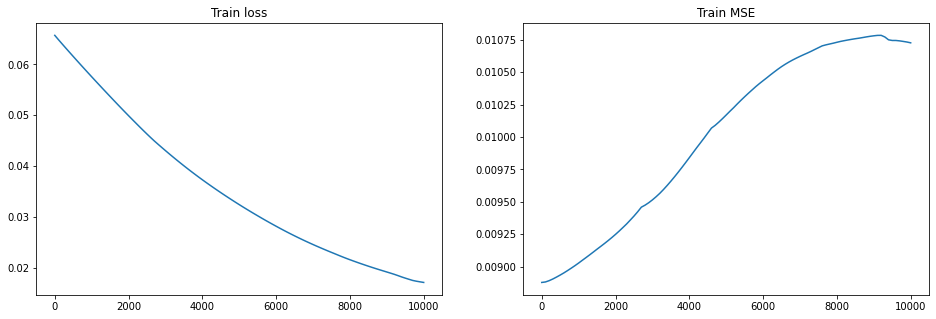

In [19]:
# Loss function plot
fig, axarr = plt.subplots(1, 2, figsize=(16, 5))

axarr[0].plot(check_every * np.arange(len(train_loss_list)), train_loss_list)
axarr[0].set_title('Train loss')

axarr[1].plot(check_every * np.arange(len(train_mse_list)), train_mse_list)
axarr[1].set_title('Train MSE')

plt.show()

[[0.49646792 0.         0.05944313]
 [0.25283173 0.18057522 0.        ]
 [0.26885816 0.0347533  0.24760519]]
True variable usage = 66.67%
Estimated variable usage = 17.12%
Accuracy = 22.22%


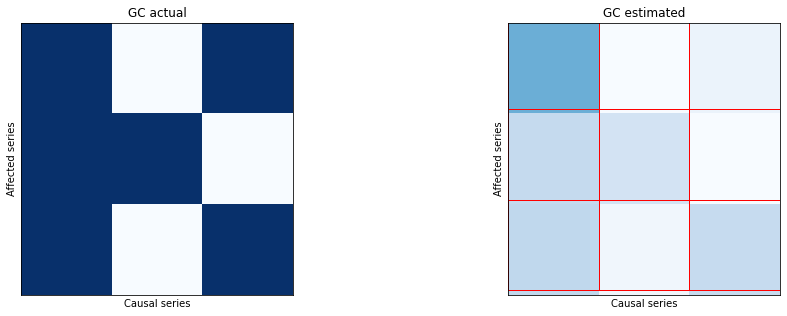

In [20]:
# Verify learned Granger causality
GC_est = cmlp.GC(threshold=False).cpu().data.numpy()
print(GC_est)

print('True variable usage = %.2f%%' % (100 * np.mean(GC)))
print('Estimated variable usage = %.2f%%' % (100 * np.mean(GC_est)))
print('Accuracy = %.2f%%' % (100 * np.mean(GC == GC_est)))

# Make figures
fig, axarr = plt.subplots(1, 2, figsize=(16, 5))
axarr[0].imshow(GC, cmap='Blues')
axarr[0].set_title('GC actual')
axarr[0].set_ylabel('Affected series')
axarr[0].set_xlabel('Causal series')
axarr[0].set_xticks([])
axarr[0].set_yticks([])

axarr[1].imshow(GC_est, cmap='Blues', vmin=0, vmax=1, extent=(0, p, p, 0))
axarr[1].set_title('GC estimated')
axarr[1].set_ylabel('Affected series')
axarr[1].set_xlabel('Causal series')
axarr[1].set_xticks([])
axarr[1].set_yticks([])

# Mark disagreements
for i in range(p):
    for j in range(p):
        if GC[i, j] != GC_est[i, j]:
            rect = plt.Rectangle((j, i-0.05), 1, 1, facecolor='none', edgecolor='red', linewidth=1)
            axarr[1].add_patch(rect)

plt.show()

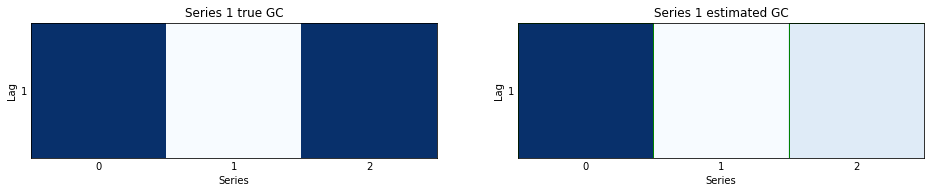

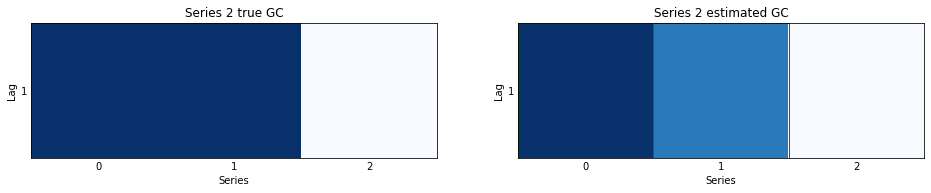

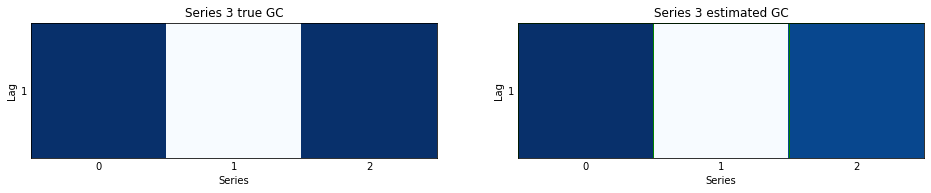

In [21]:
# Verify lag selection
for i in range(p):
    # Get true GC
    GC_lag = np.zeros((lag, p))
    GC_lag[:var_lag, GC[i].astype(bool)] = 1.0

    # Get estimated GC
    GC_est_lag = cmlp.GC(ignore_lag=False, threshold=False)[i].cpu().data.numpy().T[::-1]

    # Make figures
    fig, axarr = plt.subplots(1, 2, figsize=(16, 5))
    axarr[0].imshow(GC_lag, cmap='Blues', extent=(0, p, lag, 0))
    axarr[0].set_title('Series %d true GC' % (i + 1))
    axarr[0].set_ylabel('Lag')
    axarr[0].set_xlabel('Series')
    axarr[0].set_xticks(np.arange(p) + 0.5)
    axarr[0].set_xticklabels(range(p))
    axarr[0].set_yticks(np.arange(lag) + 0.5)
    axarr[0].set_yticklabels(range(1, lag + 1))
    axarr[0].tick_params(axis='both', length=0)

    axarr[1].imshow(GC_est_lag, cmap='Blues', extent=(0, p, lag, 0))
    axarr[1].set_title('Series %d estimated GC' % (i + 1))
    axarr[1].set_ylabel('Lag')
    axarr[1].set_xlabel('Series')
    axarr[1].set_xticks(np.arange(p) + 0.5)
    axarr[1].set_xticklabels(range(p))
    axarr[1].set_yticks(np.arange(lag) + 0.5)
    axarr[1].set_yticklabels(range(1, lag + 1))
    axarr[1].tick_params(axis='both', length=0)

    # Mark nonzeros
    for i in range(p):
        for j in range(lag):
            if GC_est_lag[j, i] > 0.0:
                rect = plt.Rectangle((i, j), 1, 1, facecolor='none', edgecolor='green', linewidth=1.0)
                axarr[1].add_patch(rect)

    plt.show()

/Users/qingwang/PycharmProjects/Neural-GC/models/cmlp.py:140: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.h:20.)
  return torch.cat([self.networks[i](X[:, :, self.sparsity[i]])


----------Iter = 5000----------
Loss = 0.009948


----------Iter = 10000----------
Loss = 0.009915


----------Iter = 15000----------
Loss = 0.009654


----------Iter = 20000----------
Loss = 0.009654


----------Iter = 25000----------
Loss = 0.009654


----------Iter = 30000----------
Loss = 0.009654


----------Iter = 35000----------
Loss = 0.009654


----------Iter = 40000----------
Loss = 0.009654


----------Iter = 45000----------
Loss = 0.009654


----------Iter = 50000----------
Loss = 0.009654


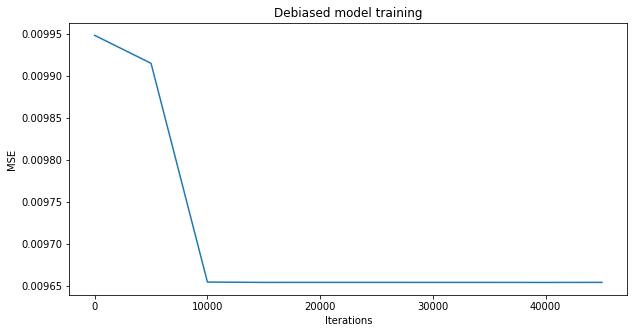

In [24]:
# Create a debiased model
sparsity = cmlp.GC().byte()
# cmlp_sparse = cMLPSparse(p, sparsity, lag, hidden).cuda(device=device)  # GPU
cmlp_sparse = cMLPSparse(p, sparsity, lag, hidden)

# Train
check_every = 5000
train_loss_list = train_model_adam(cmlp_sparse, X, lr=1e-3, niter=50000, check_every=check_every, verbose=1)

# Plot loss function
plt.figure(figsize=(10, 5))
plt.title('Debiased model training')
plt.ylabel('MSE')
plt.xlabel('Iterations')
plt.plot(check_every * np.arange(len(train_loss_list)), train_loss_list)
plt.show()

/Users/qingwang/PycharmProjects/Neural-GC/models/cmlp.py:140: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.h:20.)
  return torch.cat([self.networks[i](X[:, :, self.sparsity[i]])


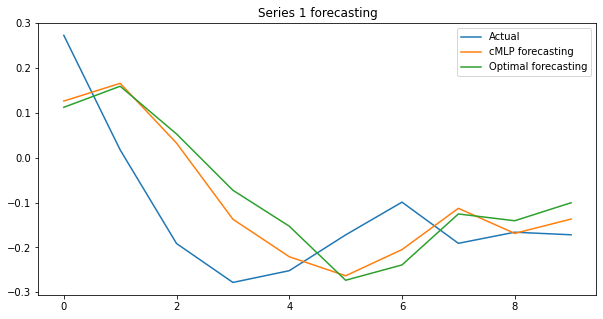

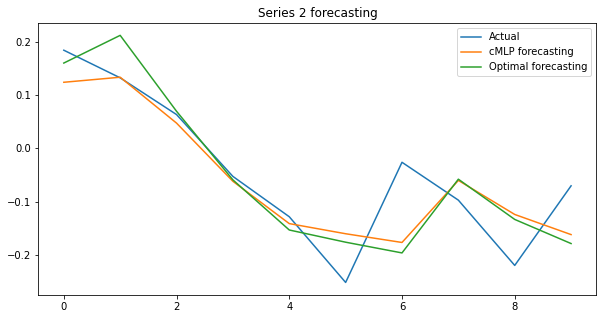

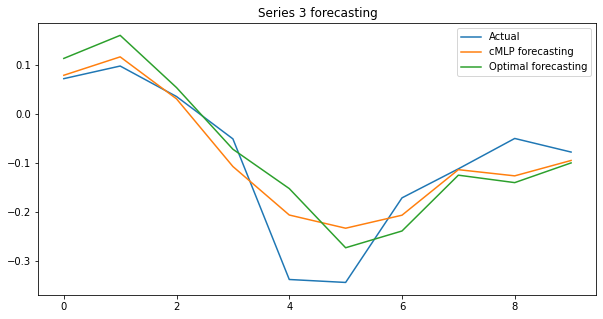

In [26]:
# Get optimal forecasts using VAR parameters
X_optimal_forecast = np.zeros((p, T-var_lag))
for t in range(T-var_lag):
    X_optimal_forecast[:, t] = np.dot(beta, X_np.T[:, t:(t+var_lag)].flatten(order='F'))
X_optimal_forecast = X_optimal_forecast.T

# Forecast using debiased cMLP
X_pred = cmlp_sparse(X)

# Plot actual data and forecasts
num_points = 10

for i in range(p):
    plt.figure(figsize=(10, 5))
    plt.plot(X[0, var_lag:num_points+var_lag, i].cpu().data.numpy(), label='Actual')
    plt.plot(X_pred[0, :num_points, i].cpu().data.numpy(), label='cMLP forecasting')
    plt.plot(X_optimal_forecast[:num_points, i], label='Optimal forecasting')
    plt.legend(loc='upper right')
    plt.title('Series %d forecasting' % (i + 1))
    plt.show()


